<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Session 5) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Small Sample Test](#t)**
    - 2.1 - **[One Sample t Test](#1t)**
    - 2.2 - **[Two Sample t Test (Unpaired)](#2t)**
    - 2.3 - **[Paired t Test](#paired)**
3. **[Z Proportion Test](#prop)**
    - 3.1 - **[One Sample Test](#1_p)**
    - 3.2 - **[Two Sample Test](#2_p)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm

# import 'stats' package from scipy library
from scipy import stats

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="t"></a>
# 2. Small Sample Test

If the sample size is small (usually, n < 30) then we use the `t-test`. These tests are also known as `exact tests`.

<a id="1t"></a>
## 2.1 One Sample t Test

Let us perform a one sample t-test for the population mean. We compare the population mean with a specific value. 

The null and alternative hypothesis is given as:

<p style='text-indent:25em'> <strong> $H_{0}: \mu = \mu_{0}$ or $\mu \geq \mu_{0}$ or $\mu \leq \mu_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: \mu \neq \mu_{0}$ or $\mu < \mu_{0}$ or $\mu > \mu_{0}$</strong></p>

The test statistic is given as:
<p style='text-indent:25em'> <strong> $t = \frac{\overline{X} -  \mu_{0}}{\frac{s}{\sqrt(n)}}$</strong></p>

Where, <br>
$\overline{X}$: Sample mean<br>
$s$: Sample standard deviation<br>
$n$: Sample size
 
Under $H_{0}$ the test statistic follows a t-distribution with n-1 degrees of freedom.

### Example:


#### 1. A survey claims that in a math test female students tend to score fewer marks than the average marks of 75 out of 100. Consider a sample of 24 female students and perform a hypothesis test to check the claim with 90% confidence.

Use the dataset available in the CSV file `mathscore_1ttest.csv`.

In [3]:
# read the students performance data 
df_female_scores = pd.read_csv('mathscore_1ttest.csv')

# display the first two observations
df_female_scores.head(2)

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,female,group C,standard,none,60,72,74,206,Nature Learning
1,female,group C,standard,none,59,72,68,199,Nature Learning


In [4]:
# consider a list of math scores of female students from the data
math_marks = list(df_female_scores['math score'])

# calculate sample mean
sample_avg = np.mean(math_marks)

# calculate sample standard deviation
sample_std = statistics.stdev(math_marks)

# sample size
n = len(math_marks)

# degrees of freedom for 1 sample t-test
print('Degrees of freedom:', n - 1)

Degrees of freedom: 23


Let us check the normality of the data.

In [5]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the math scores of female students to perform the test
stat, p_value = shapiro(math_marks)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9368310570716858
P-Value: 0.13859796524047852


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the data is normally distributed.

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu \geq 75$<br>
H<sub>1</sub>: $\mu < 75$

Here ⍺ = 0.1 and degrees of freedom = 23, for a one-tailed test let us calculate the critical t-value.

In [6]:
# calculate the t-value for 90% of confidence level
# use 'stats.t.isf()' to find the t-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.1
# pass the degrees of freedom to the parameter, 'df' 
# use 'round()' to round-off the value to 2 digits
t_val = round(stats.t.isf(q = 0.1, df = 23), 2)

print('Critical value for one-tailed t-test:', t_val)

Critical value for one-tailed t-test: 1.32


i.e. if t is less than -1.32 then we reject the null hypothesis.

In [7]:
# use 'ttest_1samp()' to calculate the test statistic and corresponding p-value for 2-tailed test
# pass the sample data to the parameter, 'a'
# pass the average value in the null hypothesis to the parameter, 'popmean'
t_stat, p_val = stats.ttest_1samp(a = math_marks, popmean = 75)

In our example, the hypothesis test is one-tailed. Thus, we divide the two-tailed probability by 2 to obtain the one-tailed probability.

In [8]:
# divide the p-value by 2
req_p_val = p_val/2

# print the test statistic value and corresponding p-value
print('Test Statistic:', t_stat)
print('p-value:', req_p_val)

Test Statistic: -3.6067380757023204
p-value: 0.0007426613957678669


In [9]:
# calculate the 90% confidence interval for the population mean
# pass the 'n-1' degrees of freedom to the parameter, 'df' 
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (sample_std / n^(1/2)) to the parameter, 'scale'
interval = stats.t.interval(0.90, df = n-1, loc = sample_avg, scale = sample_std/np.sqrt(n))

print('90% confidence interval for population mean is', interval)

90% confidence interval for population mean is (62.399452707061236, 70.51721395960543)


We can see that the test statistic value is less than -1.32, the p-value is less than 0.1, also the confidence interval does not contain the value in the null hypothesis (i.e. 75). Thus, we reject the null hypothesis and conclude that the proposed claim, i.e. in math test female students tend to get more marks than the average marks of 75 out of 100, is correct.

Let us plot the acceptance and rejection region for a left-tailed test with 90% confidence.

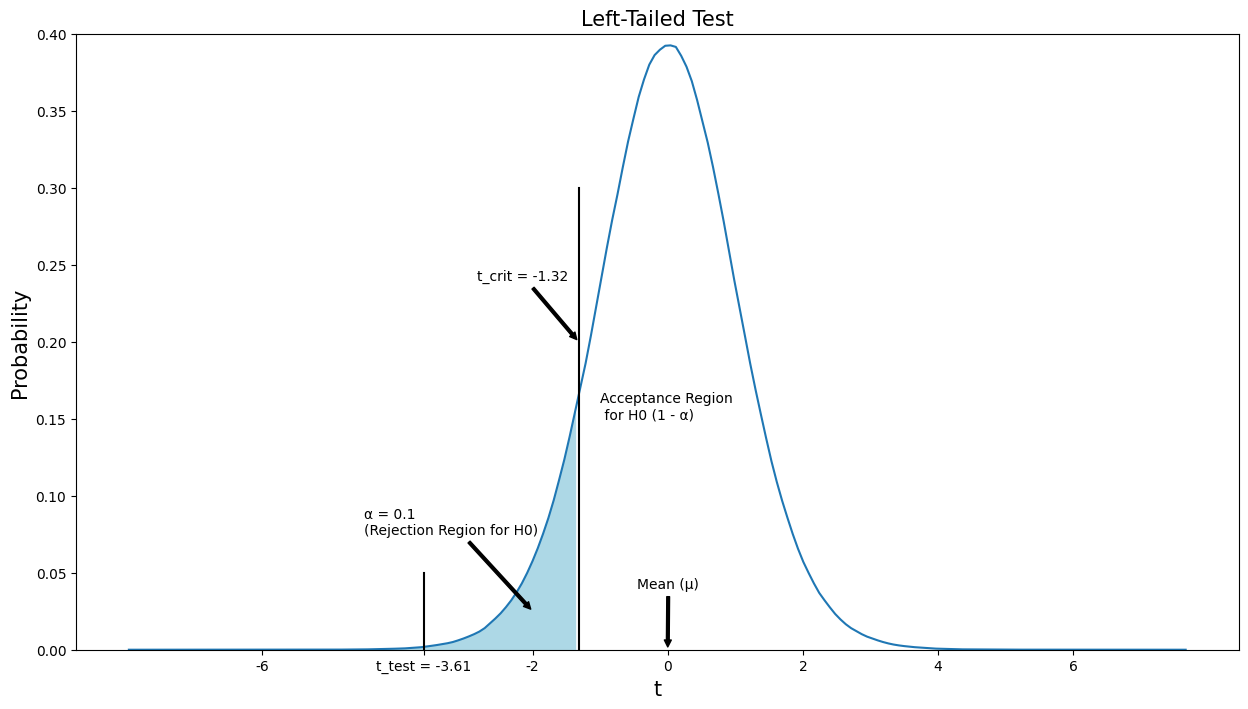

In [10]:
# consider a random variable 'X' that follows a t-distribution with 23 degrees of freedom
# pass the degrees of freedom to the parameter, 'df'
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.t.rvs(df = 23, size = 2000000, random_state = 20)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.4)

# use 'stats.t.isf()' to find the t-value for alpha = 0.1
# pass the value of 'alpha' to the parameter 'q'
# pass the degrees of freedom to the parameter, 'df' 
t = stats.t.isf(q = 0.1, df = 23)

# as t distribution is symmetric, for a left-tailed test draw a line at -(t-value)
# plot a vertical line at -(t-value) 
x, y = [-t, -t], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at test statistic value
x, y = [t_stat, t_stat], [0, 0.05]
plt.plot(x, y, color = 'black')

# add the color to the left of the t-value
# get the data for x and y axes for the distribution plot
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are less than -(t-value)
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 <= -1.32], y1[x1 <= -1.32], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text = 'Mean (μ)', xy = (0, 0), xytext = (-0.45, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'α = 0.1\n(Rejection Region for H0)', xy = (-2, 0.025), xytext = (-4.5, 0.075), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 't_crit = '+ str(round(-t,2)), xy = (-t, 0.2), xytext = (-t-1.5, 0.24), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -1, y = 0.15, s = 'Acceptance Region \n for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-6, -2, 0, 2, 4, 6, round(t_stat,2)], 
           labels = [-6, -2, 0, 2, 4, 6, 't_test = '+str(round(t_stat,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('t', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Left-Tailed Test', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the rejection region, that implies we reject $H_{0}$.

#### 2. A researcher is studying the growth of bacteria in waters of Lake Beach. The mean bacteria count of 100 per unit volume of water is within the safety level. The researcher collected 10 water samples of unit volume and found the mean bacteria count to be 94.8 with a sample variance of 72.66. Does the data indicate that the bacteria count is within the safety level? Test at the α = .05 level. Assume that the measurements constitute a sample from a normal population.

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu \geq 100$<br>
H<sub>1</sub>: $\mu < 100$

Here ⍺ = 0.05 and degrees of freedom = 9, for a one-tailed test let us calculate the critical t-value.

In [11]:
# calculate the t-value for 95% of confidence level
# use 'stats.t.isf()' to find the t-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter, 'df' 
# use 'round()' to round-off the value to 2 digits
t_val = round(stats.t.isf(q = 0.05, df = 9), 2)

print('Critical value for one-tailed t-test:', t_val)

Critical value for one-tailed t-test: 1.83


As t-distribution is symmetric, for a left-tailed test if t is less than -1.83 then we reject the null hypothesis.

In [12]:
# define a function to calculate the t-test statistic 
# pass the population mean, sample standard deviation, sample size and sample mean as the function input
def t_test(pop_mean, samp_std, n, samp_mean):
   
    # calculate the test statistic
    t_score = (samp_mean - pop_mean) / (samp_std / np.sqrt(n))

    # return the t-test value
    return t_score

# given data
n = 10
pop_mean = 100
samp_var = 72.66 
samp_mean = 94.8

# calculate sample standard deviation
samp_std = np.sqrt(samp_var)

# calculate the test statistic using the function 't_test'
t_score = t_test(pop_mean, samp_std, n, samp_mean)
print("t-score:", t_score)

t-score: -1.9291040236750068


In [13]:
# calculate the corresponding p-value for the test statistic
# use 'cdf()' to calculate P(t <= t_score)
# pass the degrees of freedom to the parameter, 'df'
p_value = stats.t.cdf(t_score, df = 9)

print('p-value:', p_value)

p-value: 0.04289782134327503


We can see that the test statistic value is less than -1.83, the p-value is less than 0.05. Thus, we reject the null hypothesis and can conclude that the average bacteria per unit volume (true mean) is within the safety levels.

<a id="2t"></a>
## 2.2 Two Sample t Test (Unpaired)

The two sample t-test is used to compare the means of two independent populations. This test assumes that the populations are normally distributed from which the samples are taken.

The null and alternative hypothesis is given as:
<p style='text-indent:25em'> <strong> $H_{0}: \mu_{1} - \mu_{2} = \mu_{0}$ or $\mu_{1} - \mu_{2} \geq \mu_{0}$ or $\mu_{1} -\mu_{2} \leq \mu_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: \mu_{1} - \mu_{2} \neq \mu_{0} $ or $\mu_{1} - \mu_{2} < \mu_{0}$ or $\mu_{1} -\mu_{2} > \mu_{0}$</strong></p>

Let us take a sample of size ($n_{1}$) from the first population and sample of size ($n_{2}$) from a second independent population. If both $n_{1}$ and $n_{2}$ are less than 30 and standard deviation of populations are unknown. We use two-sample t-test.

Consider the equal variance for both the populations. The test statistic for two sample t-test is given as:
<p style='text-indent:25em'> <strong> $t = \frac{(\overline{X_{1}} - \overline{X_{2}}) - \mu_{0}} {s \sqrt{\frac{1}{n_{1}} + \frac{1}{n_{2}}}}$</strong></p>

Where, <br>
$\overline{X_{1}}$, $\overline{X_{2}}$: Mean of both the samples<br>
$\mu_{0}$: Mean difference given in the null hypothesis<br>
$s$: Pooled standard deviation<br>
$n_{1}, n_{2}$: Size of samples from both the populations

The pooled standard deviation is defined as:
$s = \sqrt{\frac{(n_{1} - 1)s_{1}^{2} + (n_{2} - 1)s_{2}^{2}}{n_{1} + n_{2} - 2}}$ $\hspace{2cm}$  Where, $s_{1}, s_{2}$: Standard deviation of both the samples

Under $H_{0}$, the test statistic follows a t-distribution with $(n_{1}+n_{2}-2)$ degrees of freedom.

If the population variances are equal and also the sample size is the same for both the samples then the test statistic is given as:
<p style='text-indent:25em'> <strong> $t = \frac{(\overline{X_{1}} - \overline{X_{2}}) - \mu_{0}} {s \sqrt{\frac{2}{n}}}$</strong></p>

Where the pooled standard deviation $s = \sqrt{\frac{s_{1}^{2} + s_{2}^{2}}{2}}$

Under $H_{0}$, the test statistic follows a t-distribution with $(2n-2)$ degrees of freedom.

If both the population variances and the sample sizes are not equal then the Welch's test is used.

### Example: 

#### 1. The teachers' association claims that the total score of the students who completed the test preparation course is different than the total score of the students who have not completed the course. The sample data consists of 15 students who completed the course and 18 students who have not completed the course. Test the association's claim with ⍺ = 0.05.

Consider the total score of the students who have/ have not completed the preparation course are given in the CSV file `totalmarks_2ttest.csv`.

In [14]:
# read the students performance data 
df_prep_test = pd.read_csv('totalmarks_2ttest.csv')

# display the first two observations
df_prep_test.head(2)

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,male,group E,standard,completed,84,83,78,245,Speak Global Learning
1,male,group C,free/reduced,completed,79,77,75,231,Speak Global Learning


In [15]:
# consider the total marks of the students who completed the test prep course
course_complete =  df_prep_test[(df_prep_test['test preparation course'] == 'completed')]['total score']

# size of first sample
n_1 = len(course_complete)

# calculate average total marks of the students who completed the test prep course
samp_avg_1 = np.mean(course_complete)

# calculate sample standard deviation 
samp_std_1 = statistics.stdev(course_complete)

# consider the total marks of the students who have not completed the test prep course
course_incomplete = df_prep_test[(df_prep_test['test preparation course'] == 'none')]['total score']

# size of second sample
n_2 = len(course_incomplete)

# calculate average total marks of the students who have not completed the test prep course
samp_avg_2 = np.mean(course_incomplete)

# calculate sample standard deviation 
samp_std_2 = statistics.stdev(course_incomplete)

# degrees of freedom for 2 sample t-test
print('Degrees of freedom:', n_1 + n_2 - 2)

Degrees of freedom: 31


Let us check the normality of the total marks of students who have/ have not completed the test preparation course.

In [16]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the total marks of students who have/ have not completed the test preparation course
stat, p_value = shapiro(df_prep_test['total score'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9845389723777771
P-Value: 0.9080861806869507


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the total marks of students who have/ have not completed the test preparation course are normally distributed.

Let us check the equality of variances.

In [17]:
# perform Levene's test
# levene() returns a tuple having the values of test statistics and the corresponding p-value
# pass the total scores of students who have/ have not completed the test prep course to perform the test
stat, p_value = stats.levene(course_complete, course_incomplete)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.045113770764648356
P-Value: 0.8331854285659768


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the population variances are equal.

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu_{1} - \mu_{2} = 0$<br>
H<sub>1</sub>: $\mu_{1} - \mu_{2} \neq 0$

Here ⍺ = 0.05 and degrees of freedom = 31, for a two-tailed test let us calculate the critical t-value.

In [18]:
# calculate the t-value for 95% of confidence level
# use 'stats.t.isf()' to find the t-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter, 'df' 
# use 'round()' to round-off the value to 2 digits
t_val = np.abs(round(stats.t.isf(q = 0.05/2, df = 31), 2))

print('Critical value for two-tailed t-test:', t_val)

Critical value for two-tailed t-test: 2.04


i.e. if t is less than -2.04 or greater than 2.04 then we reject the null hypothesis.

In [19]:
# use 'ttest_ind()' to calculate the test statistic and corresponding p-value for 2 sample test
# pass the sample data to the parameter, 'a' and 'b'
t_stat, p_val = stats.ttest_ind(a = course_complete, b = course_incomplete)

# print the test statistic value and corresponding p-value
print('Test Statistic:', t_stat)
print('p-value:', p_val)

Test Statistic: 1.4385323319823262
p-value: 0.16030339806989594


In [20]:
# calculate pooled standard deviation
s = np.sqrt((((n_1-1)*samp_std_1**2) + ((n_2-1)*samp_std_2**2)) / (n_1 + n_2 - 2))

# calculate the 95% confidence interval for the population mean
# pass the degrees of freedom to the parameter, 'df' 
# pass the difference in the sample means to the parameter, 'loc'
# pass the scaling factor s*(1/n1 + 1/n2)^(1/2) to the parameter, 'scale'
interval = stats.t.interval(0.95, df = n_1 + n_2 - 2, loc = samp_avg_1 - samp_avg_2, scale = s * np.sqrt(1/n_1 + 1/n_2))

print('95% confidence interval for population mean is', interval)

95% confidence interval for population mean is (-7.25533827425955, 41.9886716075929)


We can see that the test statistic value is less than 2.04 and greater than -2.04, the p-value is greater than 0.05, also the confidence interval contains the value in the null hypothesis (i.e. 0). Thus, we fail to reject (i.e. accept) the null hypothesis and conclude that there is no difference in the total marks of the students who have completed the preparation course and who have not completed the preparation course.

Let us plot the acceptance and rejection region for a two-tailed test with 95% confidence.

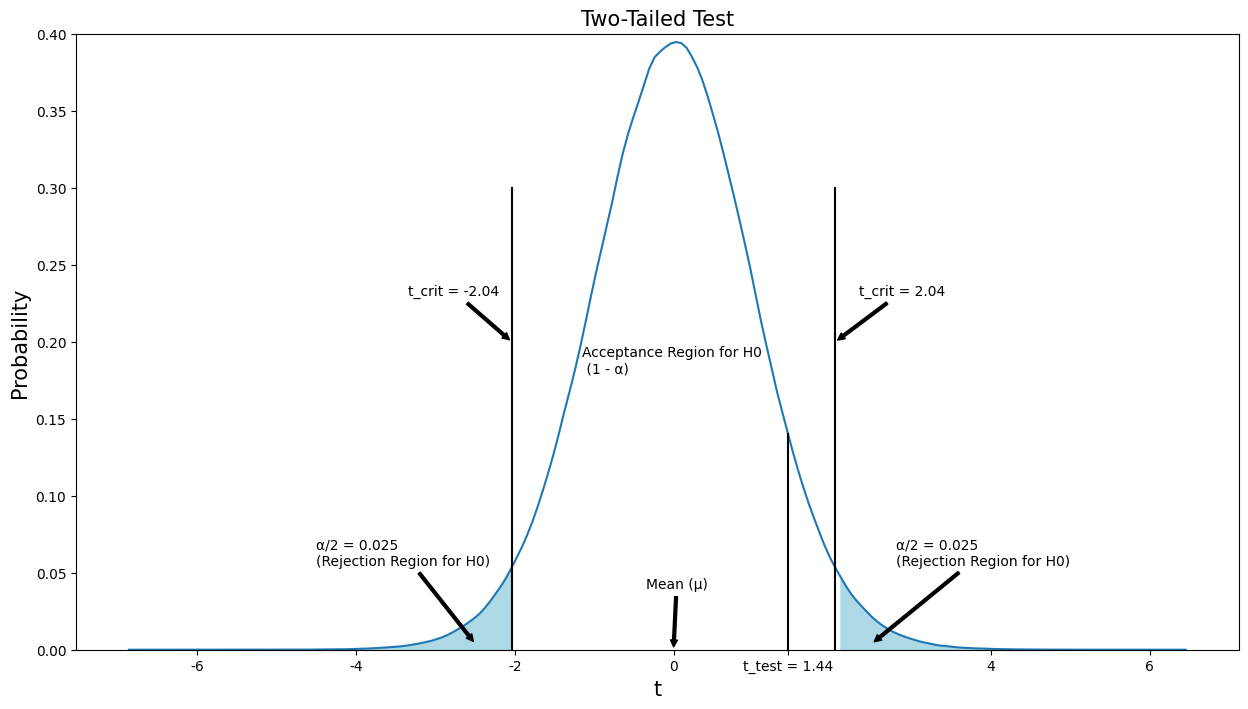

In [21]:
# consider a random variable 'X' that follows a t-distribution with 31 degrees of freedom
# pass the degrees of freedom to the parameter, 'df'
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.t.rvs(df = 31, size = 2000000, random_state = 10)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.4)

# use 'stats.t.isf()' to find the t-value for alpha = 0.05
# pass the value of 'alpha/2' to the parameter 'q' for a two tailed test
# pass the degrees of freedom to the parameter, 'df' 
t = stats.t.isf(q = 0.05/2, df = 31)

# plot a vertical line at t-value
x, y = [t, t], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at -(t-value)
x, y = [-t, -t], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at test statistic value
x, y = [t_stat, t_stat], [0, 0.14]
plt.plot(x, y, color = 'black')

# add the color to the right of the t-value and left of the -(t-value)
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical t-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= t], y1[x1 >= t], color = 'lightblue')

# fill the color for the region where x-values are less than -(t-value)
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 <= -t], y1[x1 <= -t], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text = 'Mean (μ)', xy = (0, 0), xytext = (-0.35, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'α/2 = 0.025\n(Rejection Region for H0)', xy = (2.5, 0.004), xytext = (2.8, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'α/2 = 0.025\n(Rejection Region for H0)', xy = (-2.5, 0.004), xytext = (-4.5, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 't_crit = '+ str(round(t,2)), xy = (t, 0.2), xytext = (t+0.3, 0.23), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 't_crit = '+ str(round(-t,2)), xy = (-t, 0.2), xytext = (-t-1.3, 0.23), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -1.15, y = 0.18, s = 'Acceptance Region for H0 \n (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-6, -4, -2, 0, 4, 6, round(t_stat,2)], 
           labels = [-6, -4, -2, 0, 4, 6, 't_test = '+str(round(t_stat,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('t', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Two-Tailed Test', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the acceptance region, that implies we fail to reject (i.e. accept) $H_{0}$.

#### 2. An experiment was conducted to compare the pain relieving hours of two new medicines. Two groups of 14 and 15 patients were selected and were given comparable doses. Group 1 was given medicine 1 and group 2 was given medicine 2. The following data is obtained from the two samples. Test whether the two populations give the same mean hours of relief. Assume the data comes from normal distribution has an equal variance. Use α = 0.01

<img src='unpaired_2t.PNG'>

In [22]:
# size of first sample
n_1 = 14

# mean hours for medicine 1  
samp_avg_1 = 6.4

# standard deviation of hours for medicine 1
samp_std_1 = 1.4

# size of second sample
n_2 = 15

# mean hours for medicine 2 
samp_avg_2 = 7.3

# standard deviation of hours for medicine 2
samp_std_2 = 1.5

# degrees of freedom for 2 sample t-test
print('Degrees of freedom:', n_1 + n_2 - 2)

Degrees of freedom: 27


The null and alternative hypothesis is:

H<sub>0</sub>: $\mu_{1} - \mu_{2} = 0$<br>
H<sub>1</sub>: $\mu_{1} - \mu_{2} \neq 0$

Here ⍺ = 0.01 and degrees of freedom = 27, for a two-tailed test let us calculate the critical t-value.

In [23]:
# calculate the t-value for 99% of confidence level
# use 'stats.t.isf()' to find the t-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' to the parameter 'q', here alpha = 0.01
# pass the degrees of freedom to the parameter, 'df' 
# use 'round()' to round-off the value to 2 digits
t_val = np.abs(round(stats.t.isf(q = 0.01/2, df = 27), 2))

print('Critical value for two-tailed t-test:', t_val)

Critical value for two-tailed t-test: 2.77


i.e. if t is less than -2.77 or greater than 2.77 then we reject the null hypothesis.

In [24]:
# calculate pooled standard deviation
s = np.sqrt((((n_1-1)*samp_std_1**2) + ((n_2-1)*samp_std_2**2)) / (n_1 + n_2 - 2))

# calculate the test statistic 
t_stat = (samp_avg_1 - samp_avg_2) / (s * np.sqrt(1/n_1 + 1/n_2))

# print the test statistic value 
print('Test Statistic:', t_stat)

Test Statistic: -1.667146701465023


In [25]:
# calculate the corresponding p-value for the test statistic
# use 'cdf()' to calculate P(t <= t_stat)
# pass the degrees of freedom to the parameter, 'df'
p_value = stats.t.cdf(t_stat, df = 27)

# for a two-tailed test multiply the p-value by 2
req_p = p_value*2
print('p-value:', req_p)

p-value: 0.10704510910964088


In [26]:
# calculate the 99% confidence interval for the population mean
# pass the degrees of freedom to the parameter, 'df' 
# pass the difference in the sample means to the parameter, 'loc'
# pass the scaling factor s*(1/n1 + 1/n2)^(1/2) to the parameter, 'scale'
interval = stats.t.interval(0.99, df = n_1 + n_2 - 2, loc = samp_avg_1 - samp_avg_2, scale = s * np.sqrt(1/n_1 + 1/n_2))

print('95% confidence interval for population mean is', interval)

95% confidence interval for population mean is (-2.395737993074164, 0.5957379930741649)


We can see that the test statistic value is greater than -2.77, the p-value is greater than 0.01, also the confidence interval contains the value in the null hypothesis (i.e. 0). Thus, we fail to reject (i.e. accept) the null hypothesis and conclude that the two medicines have the same hours of relief.

<a id="paired"></a>
## 2.3 Paired t Test

A paired t-test is used to compare the mean of the population for two dependent samples. The dependent samples can be the scores before and after a specific treatment. 

Let $X_{i}$ be the sample before the treatment and $Y_{i}$ be the sample after the treatment. Let $\mu_{X}$, $\mu_{Y}$ be the mean of the data X and Y respectively. The mean difference $\mu_{d} = \mu_{Y} - \mu_{X}$.

The null and alternative hypothesis is given as:

<p style='text-indent:25em'> <strong> $H_{0}: \mu_{d} = \mu_{0}$ or $\mu_{d} \geq \mu_{0}$ or $\mu_{d} \leq \mu_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: \mu_{d} \neq \mu_{0}$ or $\mu_{d} < \mu_{0}$ or $\mu_{d} > \mu_{0}$</strong></p>

The test statistic for paired t-test is given as:
<p style='text-indent:25em'> <strong> $t = \frac{\overline{X_{D}} - \mu_{0}} {\frac{s_{D}}{\sqrt{n}}}$</strong></p>

Where, <br>
$\overline{X_{D}}$: Mean difference between the pairs<br>
$\mu_{0}$: Mean difference given in the null hypothesis<br>
$s_{D}$: Standard deviation of differences between the pairs<br>
$n$: Sample size

Under $H_{0}$, the test statistic follows a t-distribution with (n-1) degrees of freedom.

### Example:

#### 1. A training institute wants to check if their writing training program was effective or not. 17 students are selected to check the hypothesis. Consider 0.05 as the level of significance.

The writing scores before and after training are provided in the CSV file `WritingScores.csv`. 

In [27]:
# read the file containing writing scores  
df_score = pd.read_csv('WritingScores.csv')

# display the first two observations
df_score.head(2)

,score_before,score_after
0,59,50
1,62,67


In [28]:
# calculate the difference between the marks
diff_marks = df_score['score_after'] - df_score['score_before']

# calculate mean difference
mean_diff = np.mean(diff_marks)

# calculate standard deviation of difference
std_diff = statistics.stdev(diff_marks)

# sample size
n = len(df_score)

print('Degrees of freedom:', n-1)

Degrees of freedom: 16


Let us check the normality of the scores before the training.

In [29]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the writing scores of students before the training to perform the test
stat, p_value = shapiro(df_score['score_before'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.947382390499115
P-Value: 0.41645893454551697


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the scores before training are normally distributed.

Let us check the normality of the score after the training.

In [30]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the writing scores of students after the training to perform the test
stat, p_value = shapiro(df_score['score_after'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9686525464057922
P-Value: 0.7944169044494629


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the scores after training are normally distributed.

The null and alternative hypothesis is:

H<sub>0</sub>: The training was not effective ($\mu_{d} = 0$)<br>
H<sub>1</sub>: The training was effective ($\mu_{d} \neq 0$)

Here ⍺ = 0.05 and degrees of freedom = 16, for a two-tailed test let us calculate the critical t-value.

In [31]:
# calculate the t-value for 95% of confidence level
# use 'stats.t.isf()' to find the t-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter, 'df' 
# use 'round()' to round-off the value to 2 digits
t_val = np.abs(round(stats.t.isf(q = 0.05/2, df = 16), 2))

print('Critical Value for two-tailed t-test:', t_val)

Critical Value for two-tailed t-test: 2.12


i.e. if t is less than -2.12 or greater than 2.12 then we reject the null hypothesis.

In [32]:
# use 'ttest_rel()' to calculate the t-statistic and corresponding p-value for paired samples
# pass the before and after scores to the function
t_stat, p_val = stats.ttest_rel(df_score['score_after'], df_score['score_before'])

# print the the t-test statistic and corresponding p-value 
print("Test Statistic:", t_stat)
print("p-value:", p_val)

Test Statistic: 1.4394882729049499
p-value: 0.16929012896279846


In [33]:
# calculate the 95% confidence interval for the population mean
# pass the 'n-1' degrees of freedom to the parameter, 'df' 
# pass the mean of the difference to the parameter, 'loc'
# pass the scaling factor (std_diff / n^(1/2)) to the parameter, 'scale'
interval = stats.t.interval(0.95, df = n-1, loc = mean_diff, scale = std_diff/np.sqrt(n))

print('90% confidence interval for population mean is', interval)

90% confidence interval for population mean is (-3.0029069531297283, 15.708789306070905)


We can see that the test statistic value is less than 2.12 and greater than -2.12, the p-value is greater than 0.05, also the confidence interval contains the value in the null hypothesis (i.e. 0). Thus, we fail to reject (i.e. accept) the null hypothesis and conclude that the training was not effective.

Let us plot the acceptance and rejection region for a two-tailed test with 95% confidence.

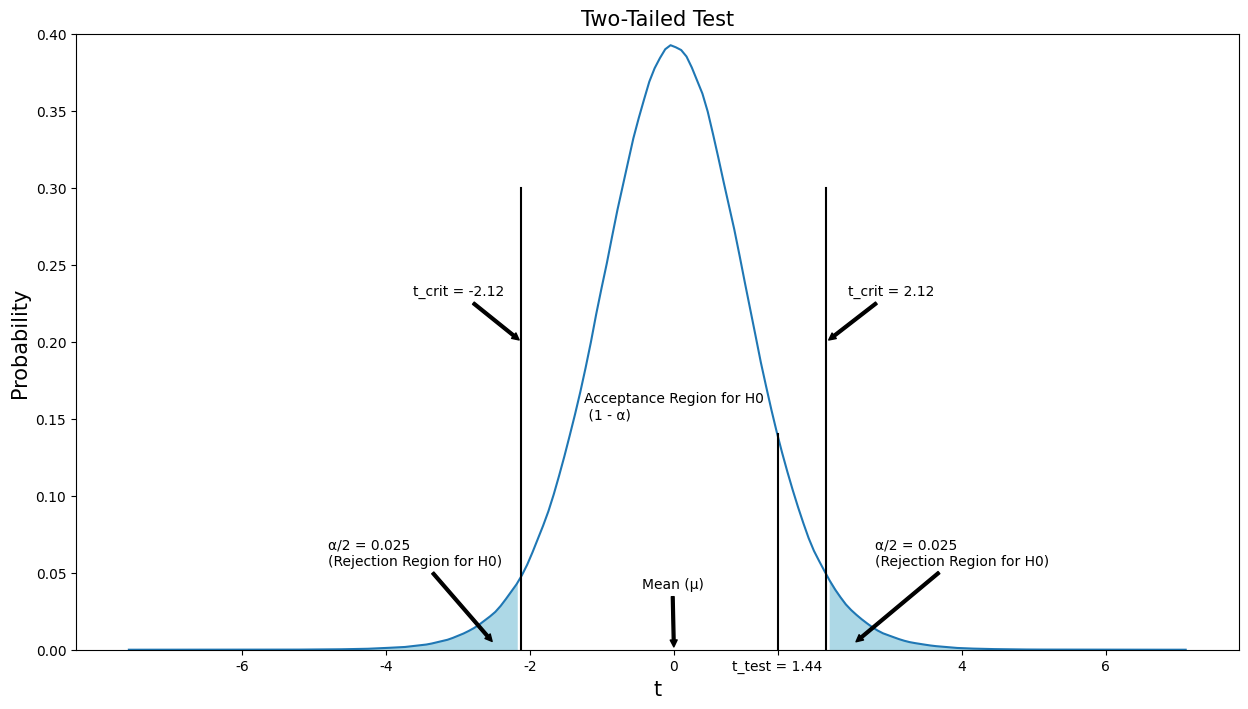

In [34]:
# consider a random variable 'X' that follows a t-distribution with 16 degrees of freedom
# pass the degrees of freedom to the parameter, 'df'
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.t.rvs(df = 16, size = 2000000, random_state = 16)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.4)

# use 'stats.t.isf()' to find the t-value for alpha = 0.05
# pass the value of 'alpha/2' to the parameter 'q' for a two tailed test
# pass the degrees of freedom to the parameter, 'df' 
t = stats.t.isf(q = 0.05/2, df = 16)

# plot a vertical line at t-value
x, y = [t, t], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at -(t-value)
x, y = [-t, -t], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at test statistic value
x, y = [t_stat, t_stat], [0, 0.14]
plt.plot(x, y, color = 'black')

# add the color to the right of the t-value and left of the -(t-value)
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical t-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= t], y1[x1 >= t], color = 'lightblue')

# fill the color for the region where x-values are less than -(t-value)
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 <= -t], y1[x1 <= -t], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text = 'Mean (μ)', xy = (0, 0), xytext = (-0.45, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'α/2 = 0.025\n(Rejection Region for H0)', xy = (2.5, 0.004), xytext = (2.8, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'α/2 = 0.025\n(Rejection Region for H0)', xy = (-2.5, 0.004), xytext = (-4.8, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 't_crit = '+ str(round(t,2)), xy = (t, 0.2), xytext = (t+0.3, 0.23),             
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 't_crit = '+ str(round(-t,2)), xy = (-t, 0.2), xytext = (-t-1.5, 0.23), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -1.25, y = 0.15, s = 'Acceptance Region for H0 \n (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-6, -4, -2, 0, 4, 6, round(t_stat,2)], 
           labels = [-6, -4, -2, 0, 4, 6, 't_test = '+str(round(t_stat,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('t', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Two-Tailed Test', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the acceptance region, that implies we fail to reject (i.e. accept) $H_{0}$.

#### 2. An energy drink distributor claims that a new advertisement poster, featuring a life-size picture of a well-known athlete, will increase the product sales in outlets by an average of 50 bottles in a week. For a random sample of 10 outlets, the following data was collected. Test that the null hypothesis that there the advertisement was effective in increasing sales. Test the hypothesis using critical region technique. Use α = 0.05.

Given data:

        sales_before = [33, 32, 38, 45, 37, 47, 48, 41, 45]
        sales_after = [42, 35, 31, 41, 37, 36, 49, 49, 48]

In [35]:
# sales before advertisement
sales_before = [33, 32, 38, 45, 37, 47, 48, 41, 45]

# sales after advertisement
sales_after = [42, 35, 31, 41, 37, 36, 49, 49, 48]

# sample size
n = len(sales_before)

# calculate the difference between the sale
diff_sale = np.array(sales_after) - np.array(sales_before)

# calculate mean difference
mean_diff = np.mean(diff_sale)

# calculate the standard deviation of difference
# pass the mean difference to the parameter, 'xbar'
std_diff = statistics.stdev(diff_sale, xbar = mean_diff)

print('Degrees of freedom:', n-1)

Degrees of freedom: 8


Let us check the normality of the sales before the advertisement.

In [36]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the sales before the advertisement to perform the test
stat, p_value = shapiro(sales_before)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9187210202217102
P-Value: 0.3817565143108368


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the sales before advertisement are normally distributed.

Let us check the normality of the sales after the advertisement.

In [37]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the sales after the advertisement to perform the test
stat, p_value = shapiro(sales_after)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9118874669075012
P-Value: 0.3293103277683258


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the  sales after the advertisement are normally distributed.

The null and alternative hypothesis is:

H<sub>0</sub>: The advertisement was not effective in increasing sales ($\mu_{d} \leq 0$)<br>
H<sub>1</sub>: The advertisement was effective in increasing sales ($\mu_{d} > 0$)

Here ⍺ = 0.05 and degrees of freedom = 8, for a one-tailed test let us calculate the critical t-value.

In [38]:
# calculate the t-value for 95% of confidence level
# use 'stats.t.isf()' to find the t-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom to the parameter, 'df' 
# use 'round()' to round-off the value to 2 digits
t_val = round(stats.t.isf(q = 0.05, df = 8), 2)

print('Critical Value for one-tailed t-test:', t_val)

Critical Value for one-tailed t-test: 1.86


i.e. if t is greater than 1.86 then we reject the null hypothesis.

In [39]:
# use 'ttest_rel()' to calculate the t-statistic and corresponding p-value for paired samples
# pass the after and before sales to the function
t_stat, p_val = stats.ttest_rel(sales_after, sales_before)

# print the t-test statistic and corresponding p-value 
print("Test Statistic:", t_stat)
print("p-value:", p_val)

Test Statistic: 0.10085458113185983
p-value: 0.9221477146925299


We can see that the test statistic value is less than 1.86. Thus, we fail to reject (i.e. accept) the null hypothesis and conclude that there is no effect of advertisement.

<a id="prop"></a>
# 3. Z Proportion Test

<a id="1_p"></a>
## 3.1 One Sample Test

Perform one sample Z test for the population proportion. We compare the population proportion ($P$) with a specific value ($P_{0}$).

The null and alternative hypothesis is given as:

<p style='text-indent:25em'> <strong> $H_{0}: P = P_{0}$ or $P \geq P_{0}$ or $P \leq P_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: P \neq P_{0}$ or $P < P_{0}$ or $P > P_{0}$</strong></p>

The test statistic for proportion Z-test is given as:
<p style='text-indent:25em'> <strong> $Z = \frac{p -  P_{0}}{\sqrt{\frac{P_{0}(1-P_{0})}{n}}}$</strong></p>

Where, <br>
$p$: Sample proportion<br>
$n$: Sample size

Under $H_{0}$, the test statistic follows a standard normal distribution.

### Example:

#### 1. In previous years, people believed that at most 80% of male students score more than 50 marks out of 100 in Mathematics. Perform a test to check whether this percentage is more than 80. Consider the level of significance as 0.05.

Consider the sample of math scores of male students available in the CSV file `StudentsPerformance.csv`.

In [40]:
# read the students performance data 
df_student = pd.read_csv('StudentsPerformance.csv')

# display the first two observations
df_student.head(2)

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,female,group B,standard,none,89,55,56,200,Nature Learning
1,female,group C,standard,completed,55,63,72,190,Nature Learning


In [41]:
# total number of male students 
total_male = len(df_student[(df_student['gender'] == 'male')])

# consider the males with math score greater than 50
male_marks_gt_50 = df_student[(df_student['gender'] == 'male') & (df_student['math score'] > 50)]

# obtain the number of male students with math score greater than 50 
num_male_marks_gt_50 = len(male_marks_gt_50)

# calculate sample proportion
p_samp = num_male_marks_gt_50/total_male

The null and alternative hypothesis is:

H<sub>0</sub>: $P \leq 0.8$<br>
H<sub>1</sub>: $P > 0.8$ 

Here ⍺ = 0.05, for a one-tailed test calculate the critical z-value.

In [42]:
# calculate the z-value for 95% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


i.e. if z is greater than 1.64 then we reject the null hypothesis.

In [43]:
# hypothesized proportion
hypo_p = 0.8 

# calculate test statistic value for 1 sample proportion test
z_prop = (p_samp - hypo_p) / np.sqrt((hypo_p * (1 - hypo_p)) / total_male)

print('Test statistic:', z_prop)

Test statistic: 4.163394160018601


In [44]:
# calculate the corresponding p-value for the test statistic
# use 'sf()' to calculate P(Z > z_prop)
p_value = stats.norm.sf(z_prop)

print('p-value:', p_value)

p-value: 1.5677570141208797e-05


In [45]:
# calculate the 95% confidence interval
# pass the sample proportion to the parameter, 'loc'
# pass the scaling factor (((p_samp*(1-p_samp))/n)^0.5) to the parameter, 'scale'
interval = stats.norm.interval(0.95, loc = p_samp, scale = np.sqrt((p_samp*(1-p_samp))/total_male))

print('95% confidence interval for population proportion is', interval)

95% confidence interval for population proportion is (0.8463611028151683, 0.9051916922158876)


Here the z-score is greater than 1.64, the p-value is less than 0.05, also the confidence interval does not contain the value in the null hypothesis (i.e. 0.8). Thus, we reject the null hypothesis and we have enough evidence to conclude that the percentage of male students scoring more than 50 marks in Mathematics is more than 80%.

Let us plot the acceptance and rejection region for a right-tailed test with 95% confidence.

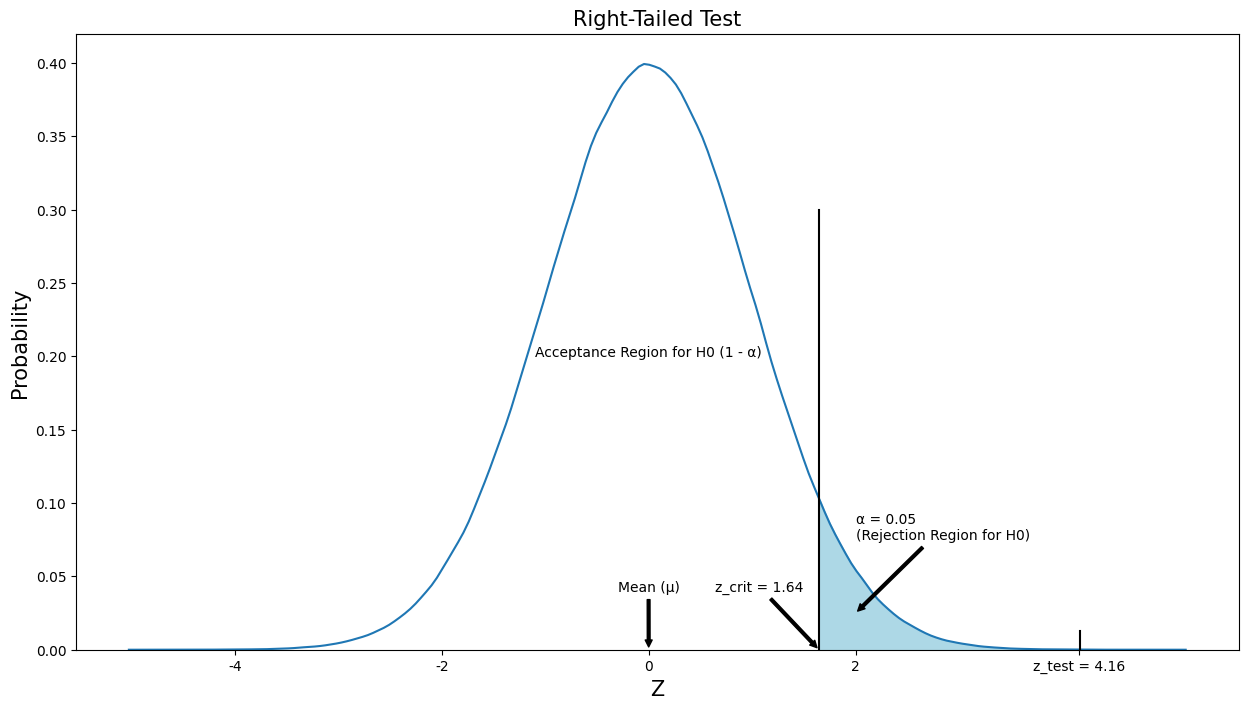

In [46]:
# consider a random variable 'X' that follows a standard normal distribution 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.norm.rvs(size = 2000000, random_state = 5)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.42)

# use 'stats.norm.isf()' to calculate the critical z-value for alpha = 0.05
# pass the value of 'alpha' to the parameter 'q'
z = stats.norm.isf(q = 0.05)

# plot a vertical line at z-value
x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at z-proportion value
x, y = [z_prop, z_prop], [0, 0.013]
plt.plot(x, y, color = 'black')

# add the color to the right of the z-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical z-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text = 'Mean (μ)', xy = (0, 0), xytext = (-0.3, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'α = 0.05\n(Rejection Region for H0)', xy = (2, 0.025), xytext = (2, 0.075), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'z_crit = '+ str(round(z,2)), xy = (z, 0), xytext = (z-1, 0.04), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -1.1, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-4, -2, 0, 2, round(z_prop,2)], 
           labels = [-4, -2, 0, 2, 'z_test = '+str(round(z_prop,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the rejection region, which implies we reject $H_{0}$ and conclude the percentage of male students scoring more than 50 marks in Mathematics is more than 80%.

#### 2. From a sample of 361 business owners had gone into bankruptcy due to recession. On taking a survey, it was found that 105 of them had not consulted any professional for managing their finance before opening the business. Test the null hypothesis that at most 25% of all businesses had not consulted before opening the business. Test the claim using p-value technique. Use α = 0.05.

The null and alternative hypothesis is:

H<sub>0</sub>: $P \leq 0.25$<br>
H<sub>1</sub>: $P > 0.25$ 

In [47]:
# sample size
n = 361

# number of business owners that did not consult before
x = 105

# sample proportion
p_samp = x / n

# hypothesized proportion
hypo_p = 0.25

# calculate test statistic value for 1 sample proportion test
z_prop = (p_samp - hypo_p) / np.sqrt((hypo_p * (1 - hypo_p)) / n)

print('Test statistic:', z_prop)

Test statistic: 1.7928245201151534


In [48]:
# calculate the corresponding p-value for the test statistic
# use 'sf()' to calculate P(Z > z_prop)
p_value = stats.norm.sf(z_prop)

print('p-value:', p_value)

p-value: 0.03650049373124949


Here the p-value is less than 0.05. Thus, we reject the null hypothesis and conclude that at least 25% of all businesses had not consulted before starting the business.

<a id="2_p"></a>
## 3.2 Two Sample Test

Perform two sample Z test for the population proportion. We check the equality of population proportions $P_{1}$ and $P_{2}$.

The null and alternative hypothesis is given as:

<p style='text-indent:25em'> <strong> $H_{0}: P_{1} - P_{2} = P_{0}$ or $P_{1} - P_{2} \geq P_{0}$ or $P_{1} - P_{2} \leq P_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: P_{1} - P_{2} \neq P_{0}$ or $P_{1} - P_{2} < P_{0}$ or $P_{1} - P_{2} > P_{0}$</strong></p>

The test statistic for two sample proportion Z-test is given as:
<p style='text-indent:25em'> <strong> $Z = \frac{(p_{1} -  p_{2}) - P_{0}}{\sqrt{\bar{P}(1-\bar{P})(\frac{1}{n_{1}} + \frac{1}{n_{2}})}}$   $\hspace{2 cm} \bar{P} = \frac{n_{1}p_{1} + n_{2}p_{2}}{n_{1} + n_{2}}$ </strong></p>

Where, <br>
$p_{1}, p_{2}$: Samples proportions<br>
$P_{0}$: Hypothesized proportion<br>
$\bar{P}$: Proportion of pooled sample<br>
$n_{1}, n_{2}$: Samples sizes

### Example:

#### 1. A team of nutritionists believes that each institute provides 'standard' lunch to an equal proportion of students. A sample of students from institutes <i>Nature Learning</i> and <i>Speak Global Learning</i> is given. Consider the null hypothesis as equality of proportion with 0.1 level of significance.

Consider the sample data available in the CSV file `StudentsPerformance.csv`.

In [49]:
# read the students performance data 
df_student = pd.read_csv('StudentsPerformance.csv')

# display the first two observations
df_student.head(2)

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,female,group B,standard,none,89,55,56,200,Nature Learning
1,female,group C,standard,completed,55,63,72,190,Nature Learning


In [50]:
# get the training institutes in the dataframe
df_student['training institute'].unique()

array(['Nature Learning', 'Speak Global Learning'], dtype=object)

The dataset contains the information about the students from two different institutes.

In [51]:
# consider the students from Nature Learning institute
df_nl = df_student[df_student['training institute'] == 'Nature Learning']

# number of students from first institute
n_1 = len(df_nl)

# number of the students with standard lunch
lunch_std_1 = len(df_nl[df_nl['lunch'] == 'standard'])

# consider the students from Speak Global Learning institute
df_sg = df_student[df_student['training institute'] == 'Speak Global Learning']

# number of students from second institute
n_2 = len(df_sg)

# number of the students with standard lunch
lunch_std_2 = len(df_sg[df_sg['lunch'] == 'standard'])

The null and alternative hypothesis is:

H<sub>0</sub>: $P_{1} - P_{2} = 0$<br>
H<sub>1</sub>: $P_{1} - P_{2} \neq 0$ 

Here ⍺ = 0.1, for a two-tailed test calculate the critical z-value.

In [52]:
# calculate the z-value for 90% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' for a two-tailed test to the parameter 'q', here alpha = 0.1
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.1/2), 2))

print('Critical value for two-tailed Z-test:', z_val)

Critical value for two-tailed Z-test: 1.64


i.e. if z is less than -1.64 or greater than 1.64 then we reject the null hypothesis.

In [53]:
# calculate test statistic value for two sample proportion test
# pass the number of students with standard lunch for both the institutes to the parameter, 'count'
# pass the size of both the samples to the parameter, 'nobs'
z_prop, p_val = sm.stats.proportions_ztest(count = np.array([lunch_std_1, lunch_std_2]), 
                                             nobs = np.array([n_1, n_2]))

# print the value of test statstic and the corresponding p-value
print('Test statistic:', z_prop)
print('p-value:', p_val)

Test statistic: 0.7935300106078008
p-value: 0.4274690915859791


In [54]:
# proportion of first sameple
p_1 = lunch_std_1/ n_1

# proportion of first sameple
p_2 = lunch_std_2/ n_2

# proportion of pooled sample
p_bar = (n_1*p_1 + n_2*p_2) / (n_1 + n_2)

# calculate the 90% confidence interval
# pass the difference in sample proportions to the parameter, 'loc'
# pass the scaling factor np.sqrt(p_bar(1-p_bar)(1/n_1 + 1/n_2)) to the parameter, 'scale'
a,b = stats.norm.interval(0.9, loc = p_1 - p_2, scale = np.sqrt(p_bar*(1-p_bar)*(1/n_1 + 1/n_2)))

print('90% confidence interval for population proportion is', interval)

90% confidence interval for population proportion is (0.8463611028151683, 0.9051916922158876)


Here the z-score is less than 1.64, the p-value is greater than 0.1, also the confidence interval contains the value in the null hypothesis (i.e. 0). Thus, we fail to reject (i.e. accept) the null hypothesis and we do not have enough evidence to conclude that the proportion of students with standard lunch is different.

Let us plot the acceptance and rejection region for a two-tailed test with 90% confidence.

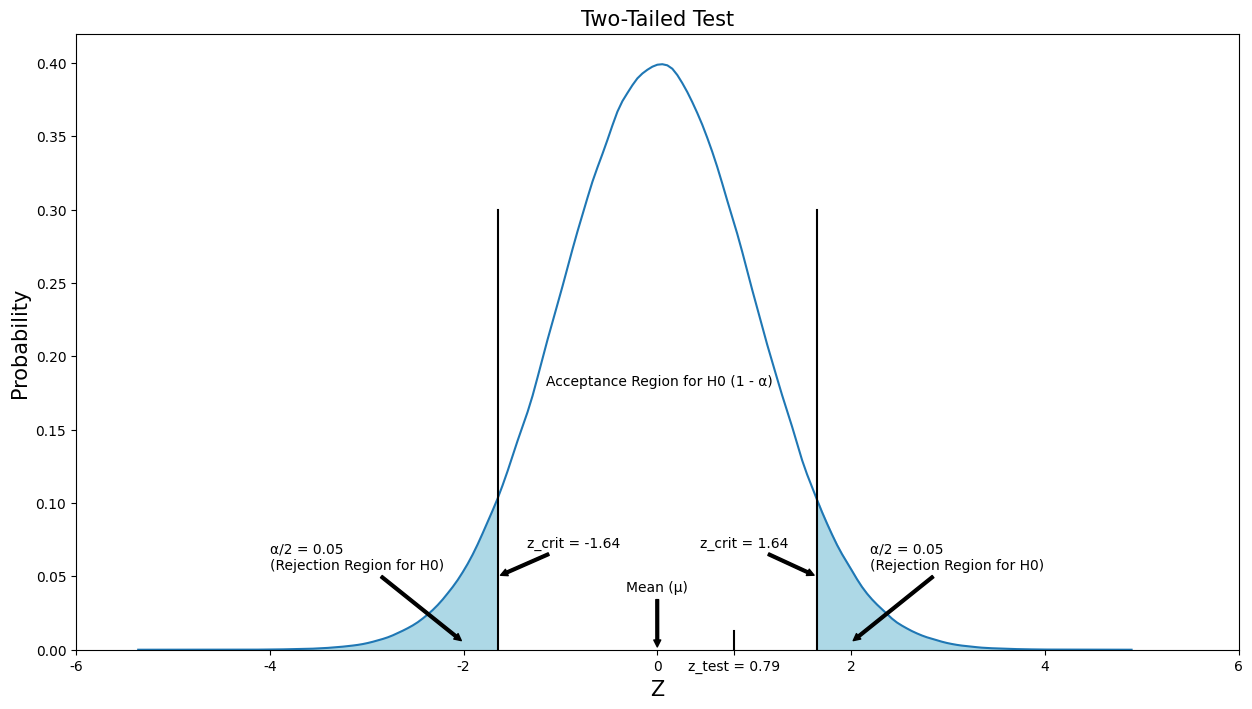

In [55]:
# consider a random variable 'X' that follows a standard normal distribution 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.norm.rvs(size = 2000000, random_state = 10)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.42)

# use 'stats.norm.isf()' to calculate the critical z-value for alpha = 0.1
# pass the value of 'alpha/2' to the parameter 'q' for a two-tailed test
z = stats.norm.isf(q = 0.1/2)

# plot a vertical line at z-value
x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at -(z-value)
x, y = [-z, -z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at z-test value
x, y = [z_prop, z_prop], [0, 0.013]
plt.plot(x, y, color = 'black')

# add the color to the right of the z-value and left of -(z-value)
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical z-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

# fill the color for the region where x-values are less than -(z-value)
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 <= -z], y1[x1 <= -z], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text = 'Mean (μ)', xy = (0, 0), xytext = (-0.32, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'α/2 = 0.05\n(Rejection Region for H0)', xy = (2, 0.005), xytext = (2.2, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'α/2 = 0.05\n(Rejection Region for H0)', xy = (-2, 0.005), xytext = (-4, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'z_crit = '+ str(round(z,2)), xy = (z, 0.05), xytext = (z-1.2, 0.07), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'z_crit = '+ str(round(-z,2)), xy = (-z, 0.05), xytext = (-z+0.3, 0.07), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -1.15, y = 0.18, s = 'Acceptance Region for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-6, -4, -2, 0, 2, 4, 6, round(z_prop,2)], 
           labels = [-6, -4, -2, 0, 2, 4, 6, 'z_test = '+str(round(z_prop,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Two-Tailed Test', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the acceptance region, that implies we fail to reject (i.e. accept) $H_{0}$.

#### 2. Steve owns a kiosk where he sells two magazines - A and B in a month. He buys 100 copies of magazine A out of which 78 were sold and 70 copies of magazine B out of which 65 were sold. Is there enough evidence to say that magazine is B is more popular? Test the claim using p-value technique with α = 0.05.

The null and alternative hypothesis is:

H<sub>0</sub>: $P_{1} \geq P_{2}$<br>
H<sub>1</sub>: $P_{1} < P_{2}$ 

In [56]:
# copies of magazine A 
num_A = 100

# copies of magazine B
num_B = 70

# number of copies sold for magazine A  
x_A = 78

# number of copies sold for magazine B 
x_B = 65

# calculate test statistic value for two sample proportion test
# pass the copies sold for both the magazines to the parameter, 'count'
# pass the size of both the samples to the parameter, 'nobs'
# pass the one-tailed condition to the parameter, 'alternative'
z_prop, p_val = sm.stats.proportions_ztest(count = np.array([x_A, x_B]), 
                                             nobs = np.array([num_A, num_B]),  
                                             alternative = 'smaller')

# print the value of test statistic and the corresponding p-value
print('Test statistic:', z_prop)
print('p-value:', p_val)

Test statistic: -2.60830803458311
p-value: 0.004549551600547303


Here the p-value is less than 0.05. Thus, we reject the null hypothesis and conclude that there is enough evidence to say that magazine B is more popular.